In [1]:
import urllib.request
import os
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tolga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [3]:
# init Objects
tokenizer=RegexpTokenizer(r'\w+')
en_stopwords=set(stopwords.words('english'))
ps=PorterStemmer()
def getCleanReview(review):
    User_review=review.lower()
    User_review=User_review.replace("<br /><br />"," ")
    #Tokenize
    tokens=tokenizer.tokenize(User_review)
    new_tokens=[token for token in tokens if token not in  en_stopwords]
    stemmed_tokens=[ps.stem(token) for token in new_tokens]
    clean_review=' '.join(stemmed_tokens)
    return clean_review

In [4]:
df['review'].apply(getCleanReview)
X_train = df.loc[:35000, 'review'].values
y_train = df.loc[:35000, 'sentiment'].values
X_test = df.loc[35000:, 'review'].values
y_test = df.loc[35000:, 'sentiment'].values

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(sublinear_tf=True, encoding='utf-8',
 decode_error='ignore')
vector.fit(X_train)
X_train=vector.transform(X_train)
X_test=vector.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
The_model=LogisticRegression(solver='liblinear')
The_model.fit(X_train,y_train)
print("Score on training data is: "+str(The_model.score(X_train,y_train)))
print("Score on testing data is: "+str(The_model.score(X_test,y_test)))

Score on training data is: 0.935973257906917
Score on testing data is: 0.8976666666666666


In [7]:
# Here 0 denotes a negative sentiment
The_model.predict(X_test[0])

array([0], dtype=int64)

In [8]:
# 78% probability that the given text is negative
The_model.predict_proba(X_test[0])

array([[0.78833439, 0.21166561]])

In [9]:
from sklearn.externals import joblib
joblib.dump(en_stopwords,'stopwords.pkl') 
joblib.dump(The_model,'model.pkl')
joblib.dump(vector,'vectorizer.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['vectorizer.pkl']

In [10]:
import sqlite3


conn = sqlite3.connect('reviewDB.sqlite')
c = conn.cursor()

c.execute('''CREATE TABLE IF NOT EXISTS myreview_db
              (the_review TEXT, sentiment_score INTEGER, the_date TEXT)''')

# first_review = 'i love this translation tool'
# c.execute("INSERT INTO myreview_DB"\
#           "(the_review, sentiment_score, the_date) VALUES"\
#           "(?, ?, DATETIME('now'))", (first_review, 1))

# second_review = 'i hate this translation tool'
# c.execute("INSERT INTO myreview_DB"\
#           "(the_review, sentiment_score, the_date) VALUES"\
#           "(?, ?, DATETIME('now'))", (second_review, 0))

# c.execute("DELETE FROM myreview_db WHERE sentiment_score = 1")
# c.execute("DELETE FROM myreview_db WHERE sentiment_score = 0")

conn.commit()
conn.close()

In [11]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('reviewDB.sqlite')
query = "SELECT the_review FROM myreview_db;"

df = pd.read_sql_query(query,conn)
print(df)

                                           the_review
0                     i hate this text to speech tool
1                           i love using this website
2                         i hate this text summarizer
3                                this is a great app!
4                                    i love this app!
5                                 this is a great app
6                  the Sentiment Analysis works well.
7        There should be more Languages to translate.
8                 I love converting my text to speech
9                                     i love this app
10                                i hate this website
11   i love that i can analyse my Audio files in text
12                              This website is great
13                  i love this website it works well
14                           This website works great
15                              the tools work great!
16  i love using this website to translate my audi...
17  i love using this websit

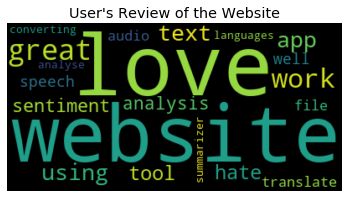

In [16]:
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = df.the_review.tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.title("User's Review of the Website")
plt.savefig('UserReview.png')

wordcloud.to_file('UserReview.png')
plt.axis('off')
plt.show()

In [17]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('reviewDB.sqlite')
query = "SELECT sentiment_score FROM myreview_db;"
df1 = pd.read_sql_query(query,conn)
df1

,sentiment_score
0,negative
1,positive
2,negative
3,positive
4,positive
5,positive
6,positive
7,negative
8,positive
9,positive


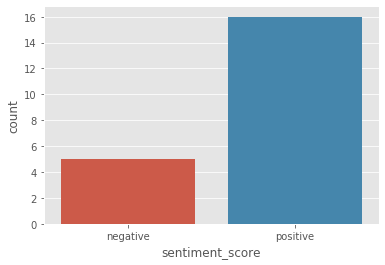

In [18]:
import seaborn as sns
ax = sns.countplot(x="sentiment_score",data=df1)
plt.savefig('sentiment_score_comparsion.png')

All frequencies, including STOPWORDS:
      Word  Frequency
0     this         14
1        i         13
2     love          9
3  website          8
4    great          7
5       to          6
6    works          5
7        .          5
8     text          4
9    using          4


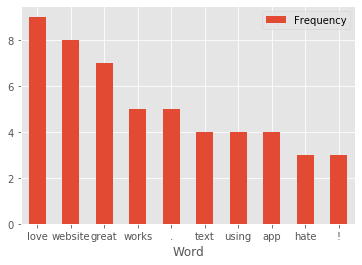

In [19]:
import sqlite3
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk

top_N = 10


conn = sqlite3.connect('reviewDB.sqlite')
query = "SELECT the_review FROM myreview_db;"

df = pd.read_sql_query(query,conn)

txt = df.the_review.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')


rslt.plot.bar(rot=0)
plt.savefig('frequentwords_userreview.png')